In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("./Loan approval prediction.csv")
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [3]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [4]:
print(df.head())

   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0              

# EDA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58645.0,29322.000000,16929.497605,0.00,14661.00,29322.00,43983.00,58644.00
person_age,58645.0,27.550857,6.033216,20.00,23.00,26.00,30.00,123.00
person_income,58645.0,64046.172871,37931.106979,4200.00,42000.00,58000.00,75600.00,1900000.00
person_emp_length,58645.0,4.701015,3.959784,0.00,2.00,4.00,7.00,123.00
loan_amnt,58645.0,9217.556518,5563.807384,500.00,5000.00,8000.00,12000.00,35000.00
loan_int_rate,58645.0,10.677874,3.034697,5.42,7.88,10.75,12.99,23.22
loan_percent_income,58645.0,0.159238,0.091692,0.00,0.09,0.14,0.21,0.83
cb_person_cred_hist_length,58645.0,5.813556,4.029196,2.00,3.00,4.00,8.00,30.00
loan_status,58645.0,0.142382,0.349445,0.00,0.00,0.00,0.00,1.00


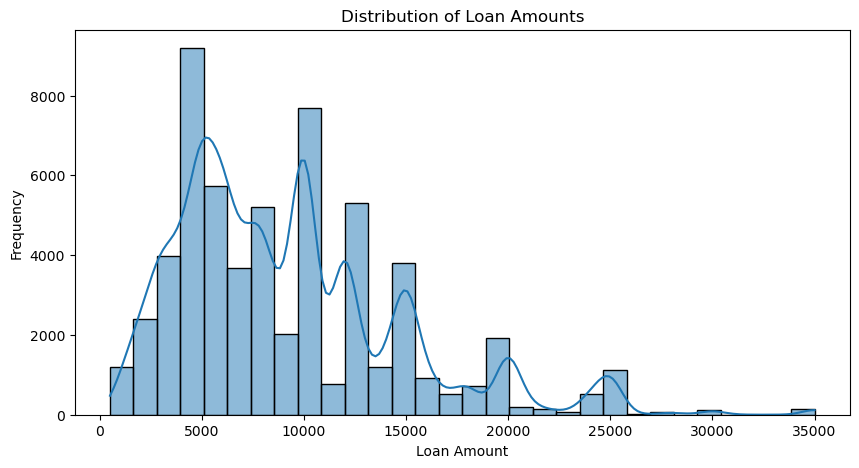

In [6]:
# Distribution of loan amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

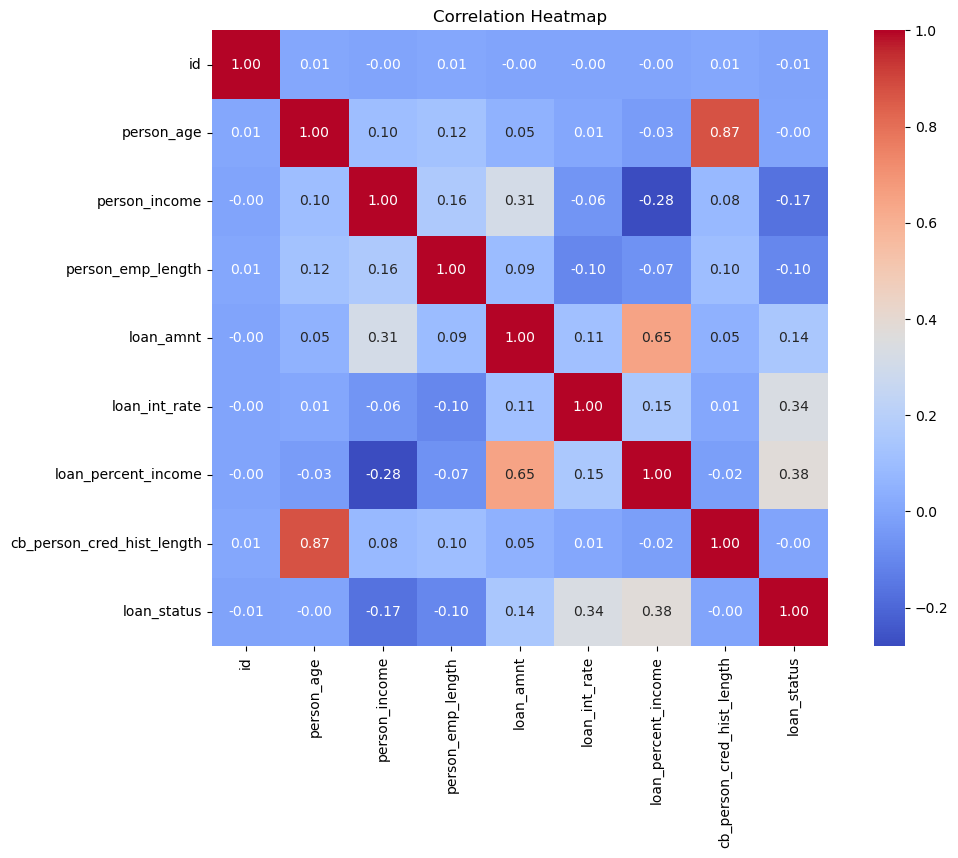

In [7]:
# Correlation heatmap (only numeric columns)
plt.figure(figsize=(12, 8))
numeric_data = df.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
correlation_matrix = numeric_data.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


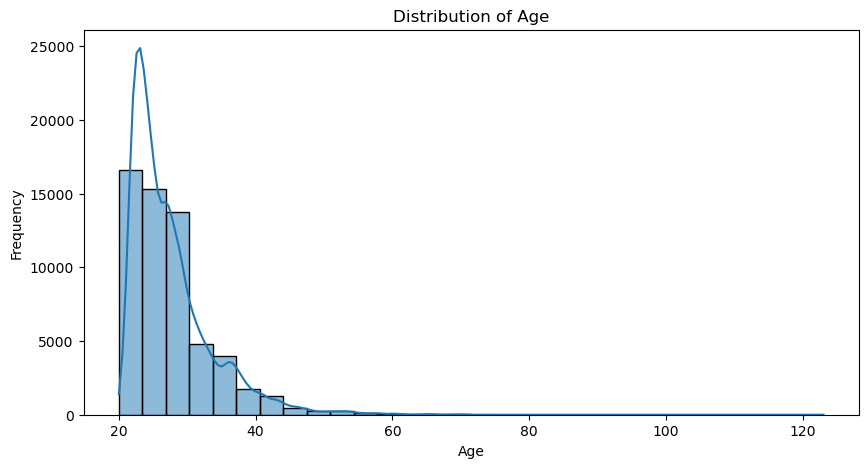

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['person_age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [10]:
numeric_columns = [
    'person_age', 'person_income ', 'person_emp_length', 
    'loan_amnt', 'loan_int_rate', 
    'loan_percent_income', 'cb_person_cred_hist_length', 
    'loan_status'
]

In [11]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [12]:
print(df.columns.tolist())


['id', 'person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status']


In [13]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Detect outliers for each numeric column
outliers_iqr = {col: detect_outliers_iqr(df, col) for col in numeric_columns}

# Print the number of outliers detected in each column
for col, outliers in outliers_iqr.items():
    print(f'Outliers in {col}: {len(outliers)}')


Outliers in id: 0
Outliers in person_age: 2446
Outliers in person_income: 2411
Outliers in person_emp_length: 1274
Outliers in loan_amnt: 2045
Outliers in loan_int_rate: 34
Outliers in loan_percent_income: 1210
Outliers in cb_person_cred_hist_length: 1993
Outliers in loan_status: 8350


In [14]:
sns.set(style="whitegrid")
custom_palette = sns.color_palette(["#81c784", "#388e3c", "#74c69d"])

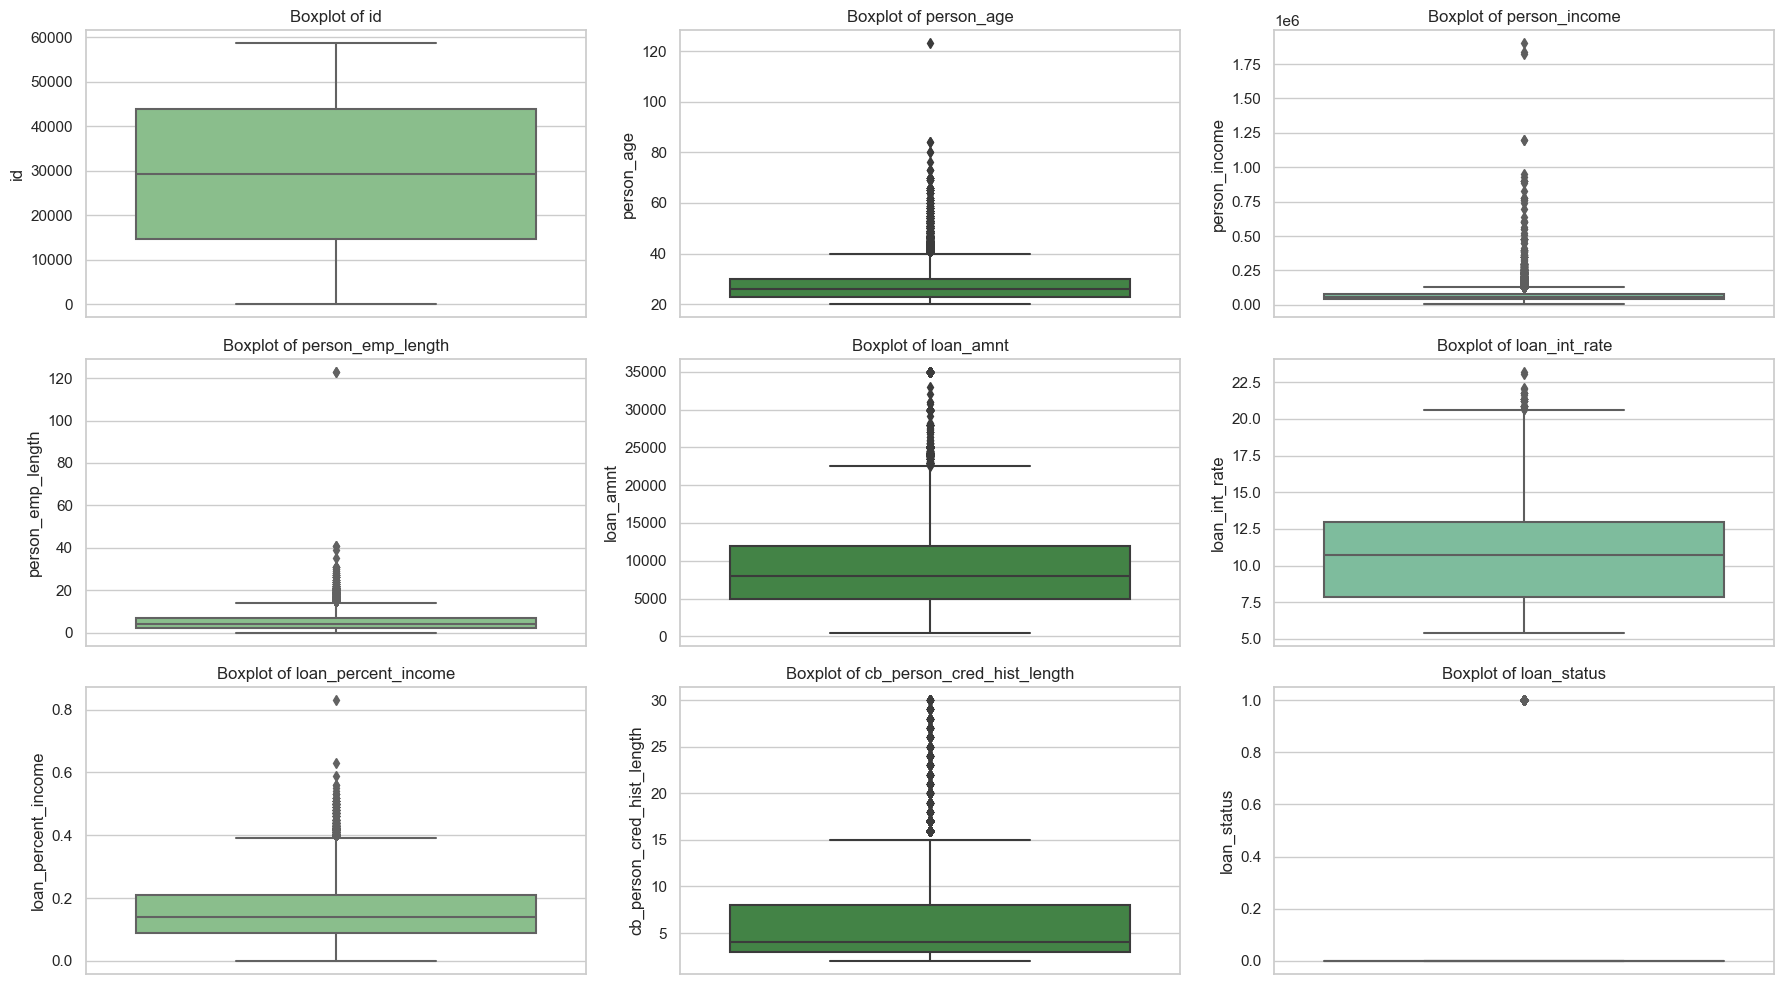

In [15]:
def plot_boxplots(df, columns):
    plt.figure(figsize=(18, 10))
    for i, col in enumerate(columns):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(y=df[col], color=custom_palette[i % 3])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df, numeric_columns)

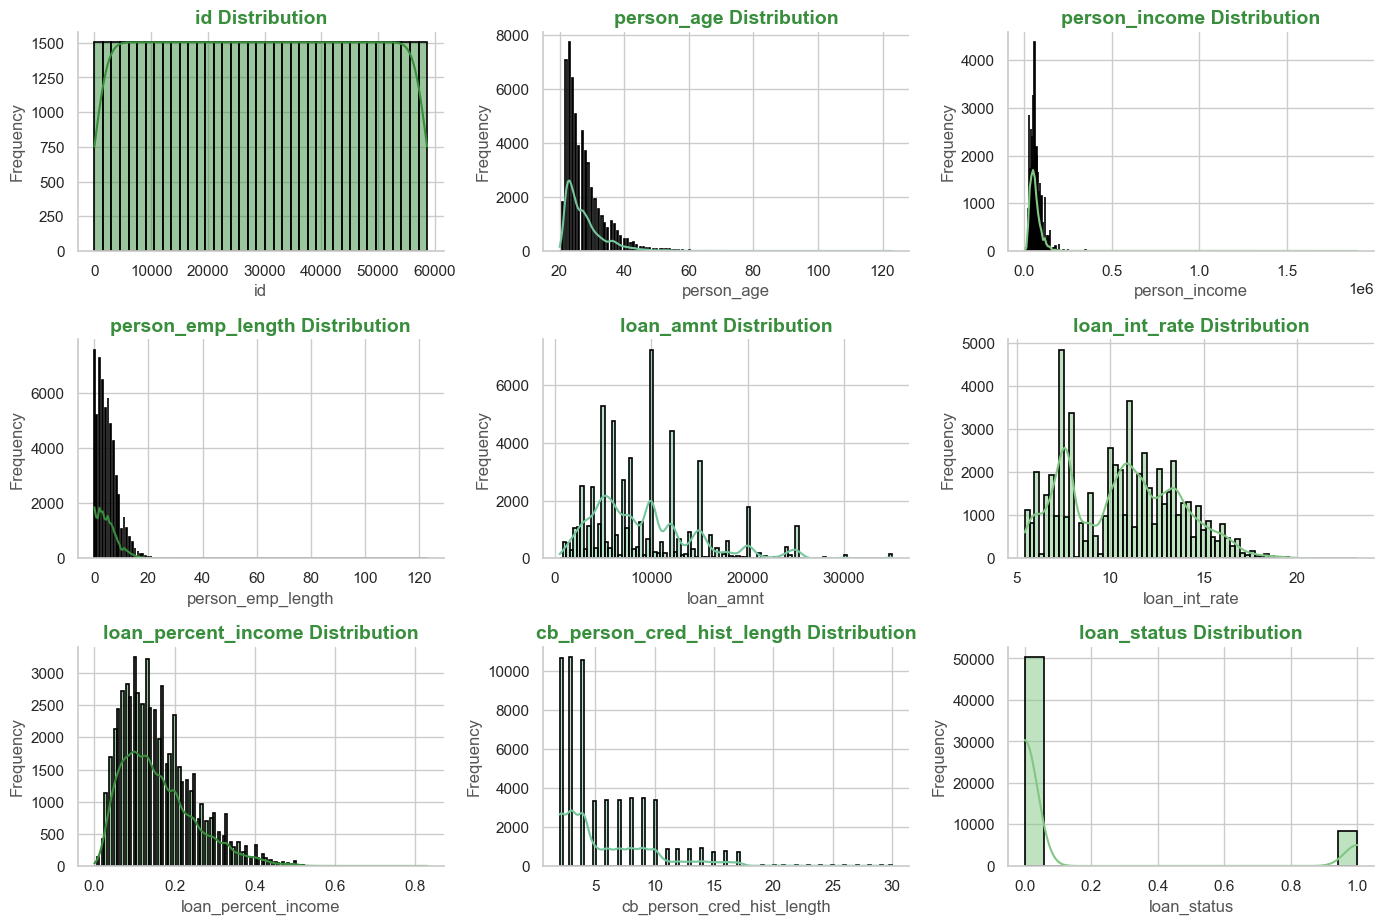

In [16]:
plt.figure(figsize=(14, 12))

for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, idx)  
    sns.histplot(df[col], kde=True, color=custom_palette[idx % 3], edgecolor="black", linewidth=1.2) 
    
    plt.title(f'{col} Distribution', fontsize=14, weight='bold', color="#388e3c")
    plt.xlabel(col, fontsize=12, color="#555555")
    plt.ylabel('Frequency', fontsize=12, color="#555555")
    
    sns.despine()

plt.tight_layout()
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [18]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

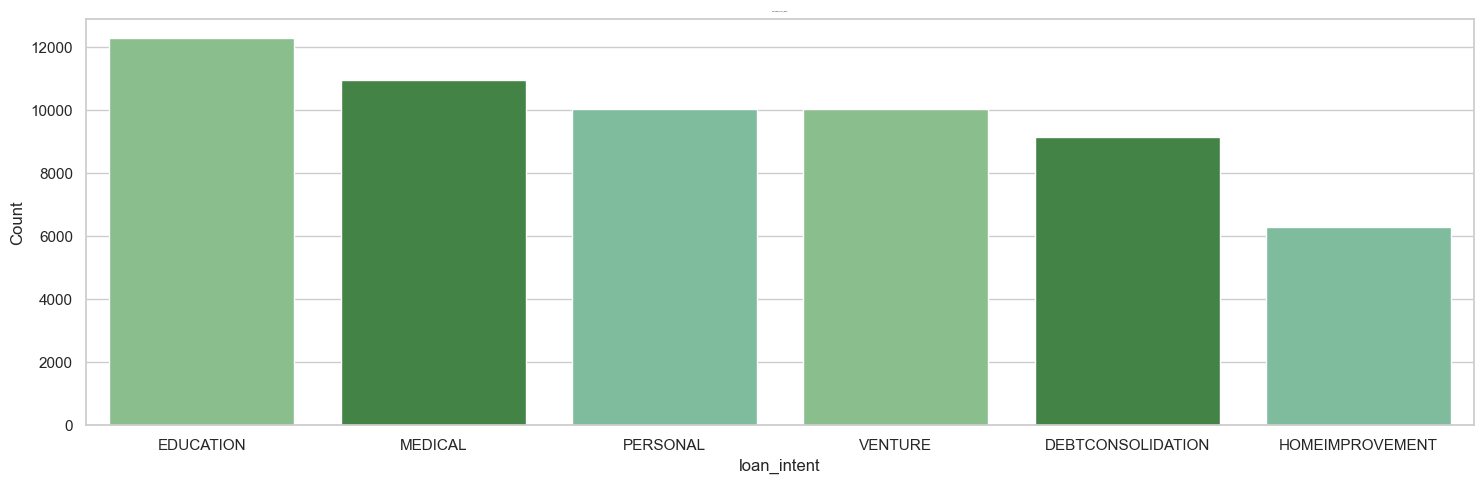

In [19]:
categorical_columns1 = ['loan_intent']
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns1, 1):
    plt.subplot(1, 1, i)
    sns.countplot(x=df[column], palette=custom_palette)
    plt.title(f'Distribution of {column}', fontsize=1)
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

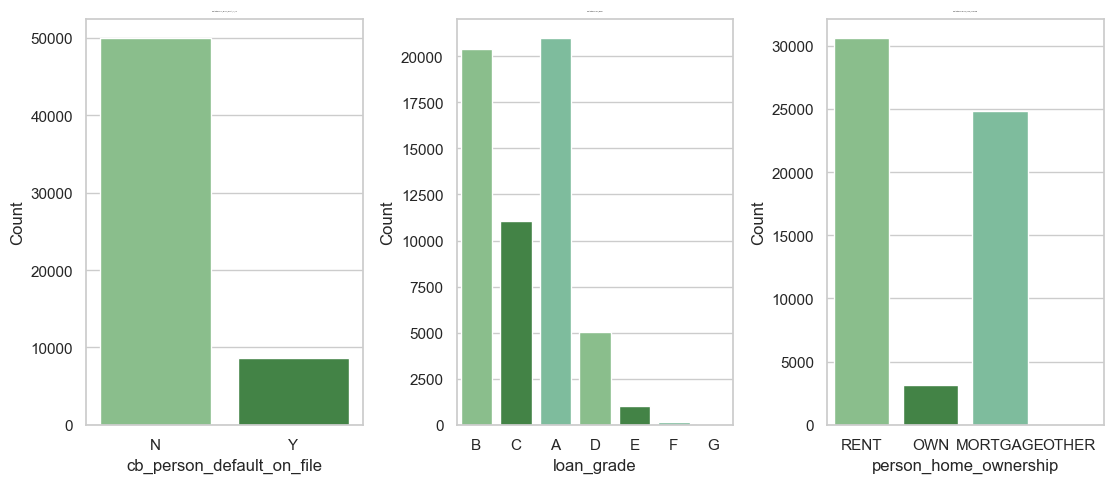

In [20]:
categorical_columns2 = [ 'cb_person_default_on_file', 'loan_grade','person_home_ownership']

plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns2, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=df[column], palette=custom_palette)
    plt.title(f'Distribution of {column}', fontsize=1)
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [21]:
categorical_columns=['loan_intent','cb_person_default_on_file', 'loan_grade','person_home_ownership']

# DATA CLEANING

In [22]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [23]:
df.drop(columns=['id'], inplace=True)


In [24]:
from scipy import stats

In [25]:
# List of numerical columns in your data
numerical_columns = ['person_income', 'loan_amnt', 'person_age', 'person_emp_length', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Z-Score Method for Outlier Detection
def detect_outliers_zscore(df, columns, threshold=3):
    outlier_indices = []
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outlier_indices.extend(np.where(z_scores > threshold)[0])
    return set(outlier_indices)

In [26]:
# Detect outliers using Z-scores
outliers_zscore = detect_outliers_zscore(df, numerical_columns)
print(f'Number of outliers detected using Z-scores: {len(outliers_zscore)}')


Number of outliers detected using Z-scores: 2835


In [27]:
# IQR Method for Outlier Detection
def detect_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return set(outlier_indices)

In [28]:
# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(df, numerical_columns)
print(f'Number of outliers detected using IQR: {len(outliers_iqr)}')

Number of outliers detected using IQR: 8763


In [29]:
# Removing Outliers
# To remove the outliers from the DataFrame, combine the indices from both methods
outliers_combined = outliers_zscore.union(outliers_iqr)
df_no_outliers = df.drop(index=outliers_combined)

In [30]:
df_cleaned = df.drop(index=outliers_zscore)
print(f'Shape of DataFrame after outlier removal: {df_cleaned.shape}')

Shape of DataFrame after outlier removal: (55810, 12)


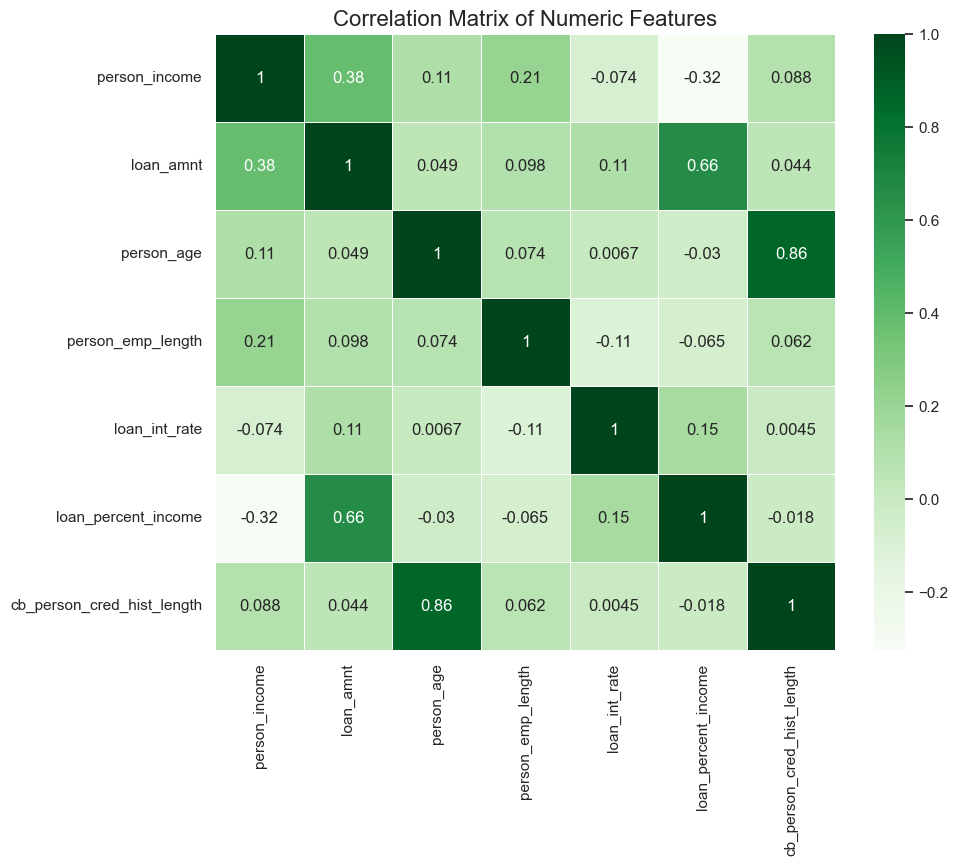

In [31]:
correlation_matrix = df_cleaned[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5) 
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

In [32]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

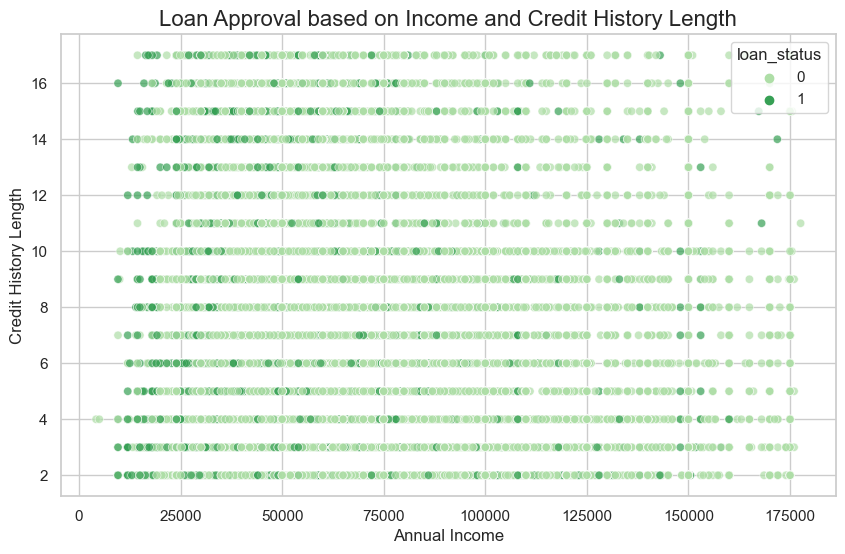

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_income', y='cb_person_cred_hist_length', hue='loan_status', data=df_cleaned, palette="Greens", alpha=0.7)
plt.title('Loan Approval based on Income and Credit Score', fontsize=16)
plt.title('Loan Approval based on Income and Credit History Length', fontsize=16)
plt.xlabel('Annual Income')
plt.ylabel('Credit History Length')
plt.show()

c:\Users\Techno Shield\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Techno Shield\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Techno Shield\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\Techno Shield\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
c:\Users\Techno Shield\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=x, y=y, **kwa

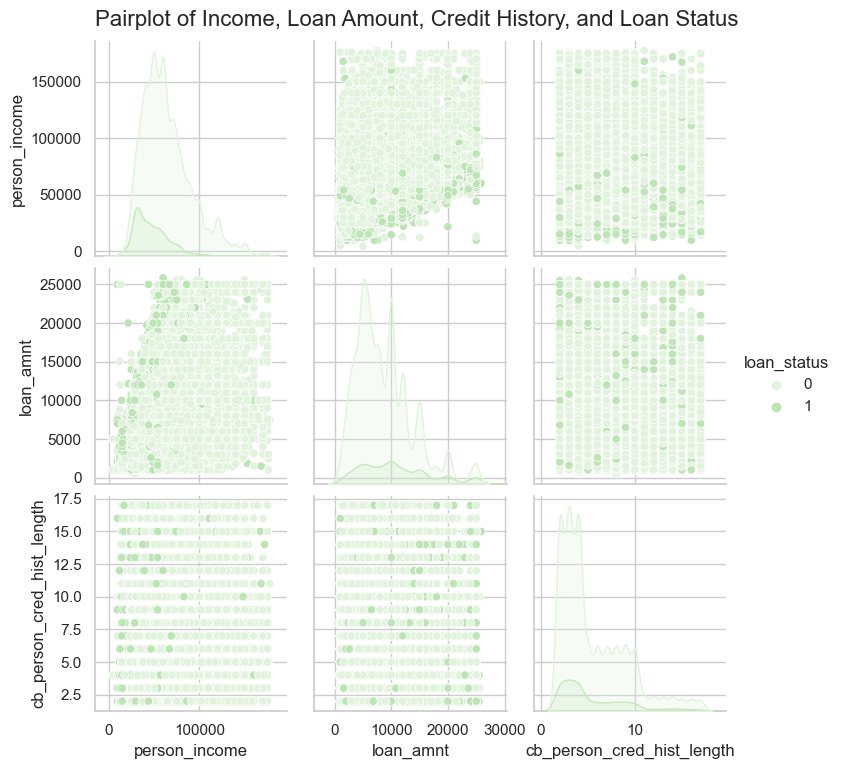

In [34]:
# Select columns for pairplot analysis
custom_palette = sns.color_palette("Greens")
selected_columns = ['person_income', 'loan_amnt', 'cb_person_cred_hist_length', 'loan_status']
sns.pairplot(df_cleaned[selected_columns], hue='loan_status', palette=custom_palette, diag_kind='kde')
plt.suptitle('Pairplot of Income, Loan Amount, Credit History, and Loan Status', y=1.02, fontsize=16)
plt.show()

In [35]:
numeric_columns = [col for col in df_cleaned.columns if df_cleaned[col].dtype != 'object']  # Adjust as needed

# Function to detect outliers using Z-scores
def detect_outliers_zscore(df, columns, threshold=3):
    outlier_indices = []
    for col in columns:
        # Check if column exists and has numeric values
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            # Drop NaNs for Z-score calculation
            z_scores = np.abs(stats.zscore(df[col].dropna()))
            outlier_indices.extend(df[col].index[z_scores > threshold].tolist())
    return set(outlier_indices)

# Detect outliers
outliers_zscore = detect_outliers_zscore(df_cleaned, numeric_columns)
print(f'Number of outliers detected using Z-scores: {len(outliers_zscore)}')

Number of outliers detected using Z-scores: 3427


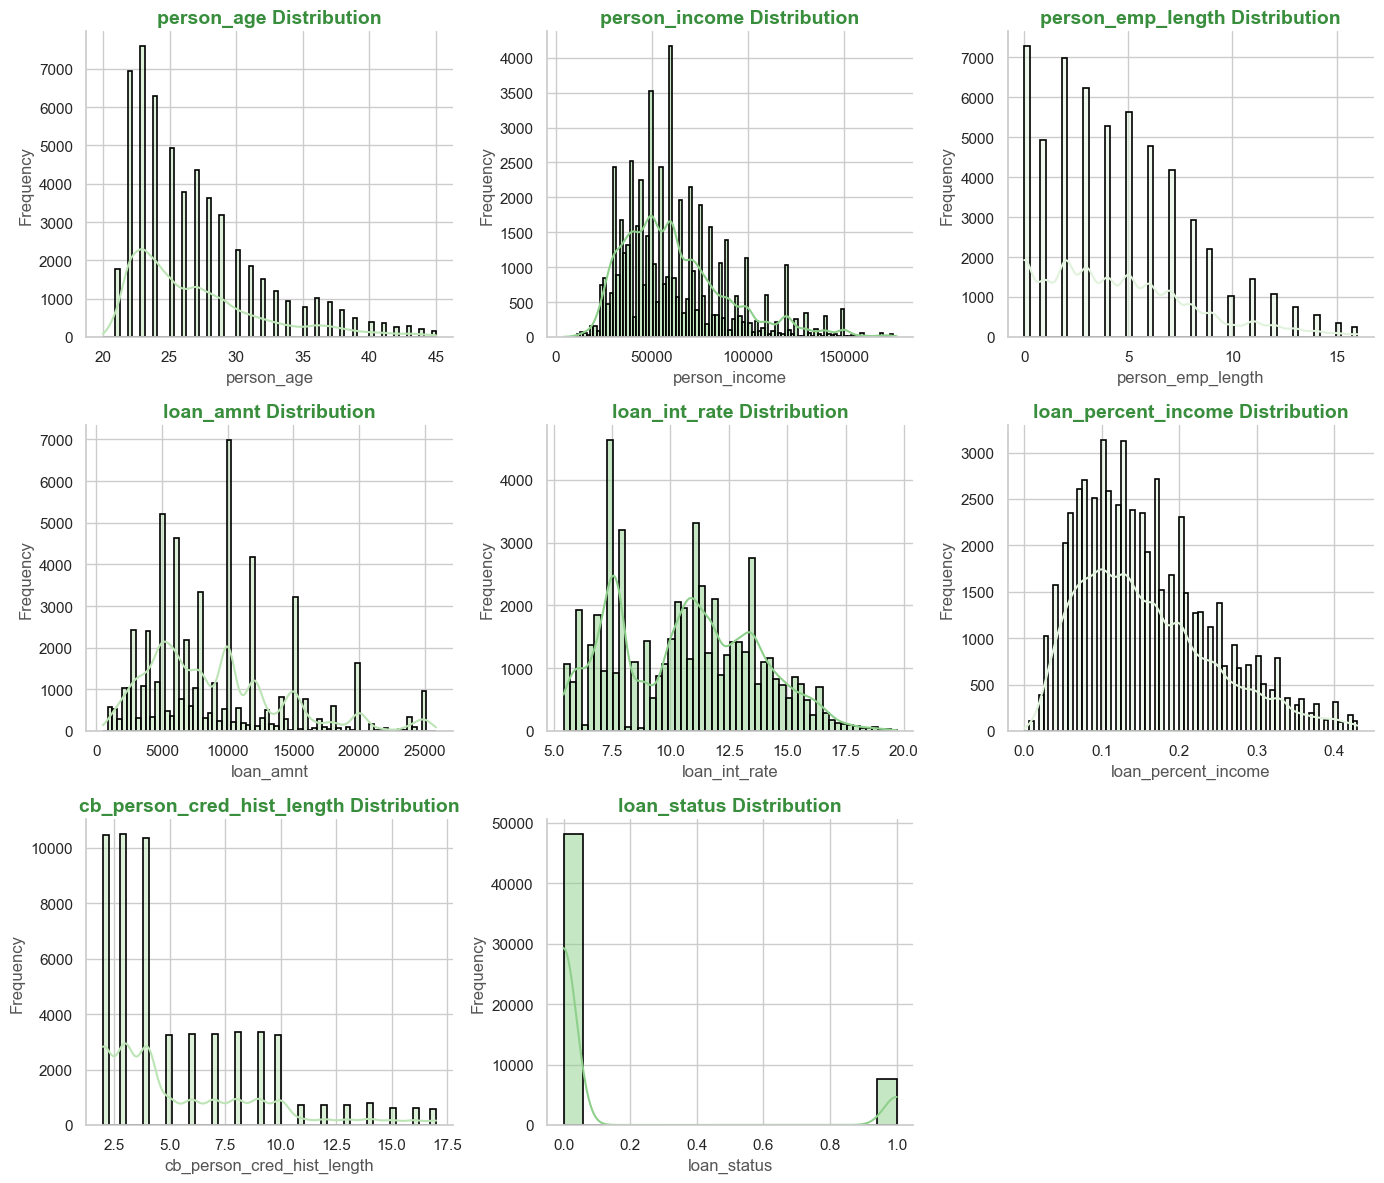

In [36]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(14, 12))

for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, idx)  
    sns.histplot(df_cleaned[col], kde=True, color=custom_palette[idx % 3], edgecolor="black", linewidth=1.2) 
    
    plt.title(f'{col} Distribution', fontsize=14, weight='bold', color="#388e3c")
    plt.xlabel(col, fontsize=12, color="#555555")
    plt.ylabel('Frequency', fontsize=12, color="#555555")
    
    sns.despine()

plt.tight_layout()
plt.show()

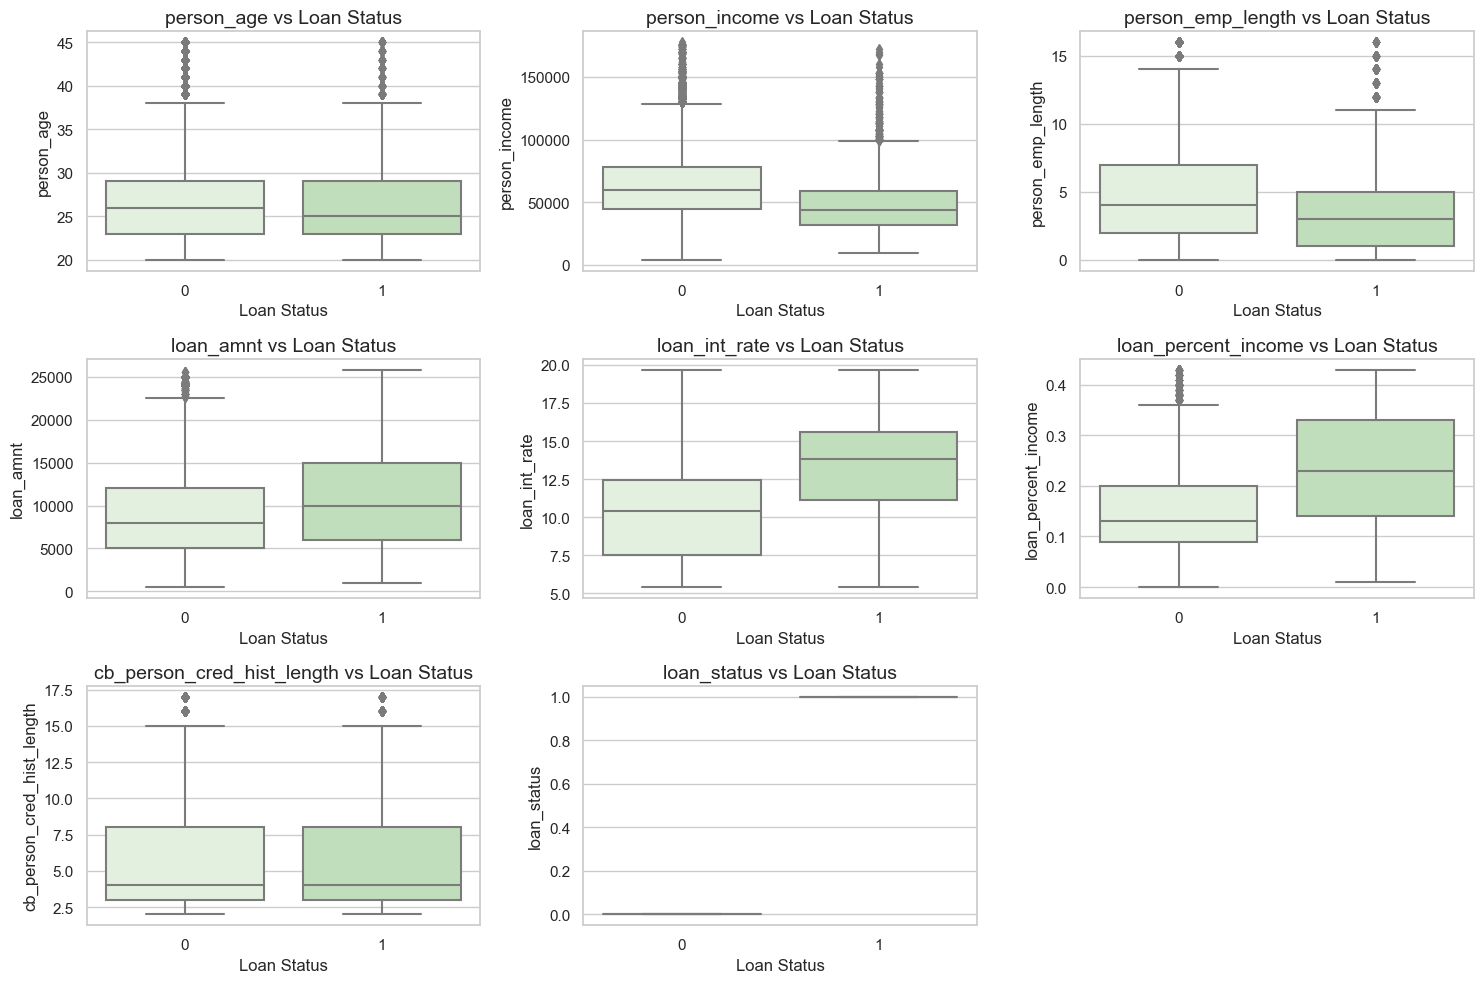

In [37]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='loan_status', y=column, data=df_cleaned, palette=custom_palette)
    plt.title(f'{column} vs Loan Status', fontsize=14)
    plt.xlabel('Loan Status')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [38]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [39]:
# Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd


In [40]:
# Step 1: Encode Categorical Variables and Prepare Target Variable
label_encoder = LabelEncoder()
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

In [41]:
# Separate features and target
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [42]:
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['number']).columns


In [43]:
# One-Hot Encode Categorical Variables
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)


In [44]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=100, stratify=y)

In [45]:
#Scale Numeric Data
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [46]:
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=48, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=48),
    "Decision Tree": DecisionTreeClassifier(random_state=100),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=48),
    "XGBoost": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}



In [47]:
# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f"\nTraining and Evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'Accuracy: {accuracy:.2f}')




Training and Evaluating Logistic Regression...
Accuracy: 0.91

Training and Evaluating K-Nearest Neighbors...
Accuracy: 0.93

Training and Evaluating Support Vector Machine...
Accuracy: 0.94

Training and Evaluating Decision Tree...
Accuracy: 0.91

Training and Evaluating Random Forest...
Accuracy: 0.95

Training and Evaluating Gradient Boosting...
Accuracy: 0.95

Training and Evaluating XGBoost...
Accuracy: 0.95

Training and Evaluating Naive Bayes...
Accuracy: 0.89
